# Simple Linear Regression

*Model to predict sales based on the money spent on different platforms for marketing*

*Dataset provided by ISLR & analyze the relationship between *TV adverstising* & *sales* using Simple Linear Regression model*

In [273]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [274]:
# importing data using pandas dataframe
df = pd.read_csv("C:\\Users\\sunta\\OneDrive\\Desktop\\data\\linearRegression\\advertising.csv")

In [275]:
# checking dataframe
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [276]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


*Descriptive statistics*

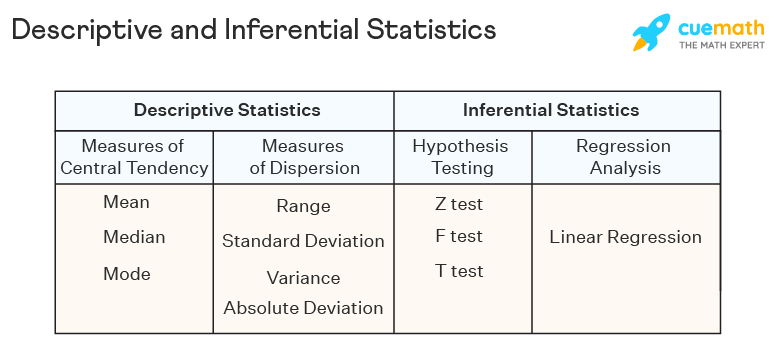

In [277]:
# descriptive statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


*Interpreting values:*

*Advertising company makes $147K on an average on TV, $30.5K on Newspaper & $23.2K on Radio.*

*Average sales resulting from advertising campaigns is 15.13K units sold*

<Axes: ylabel='Radio'>

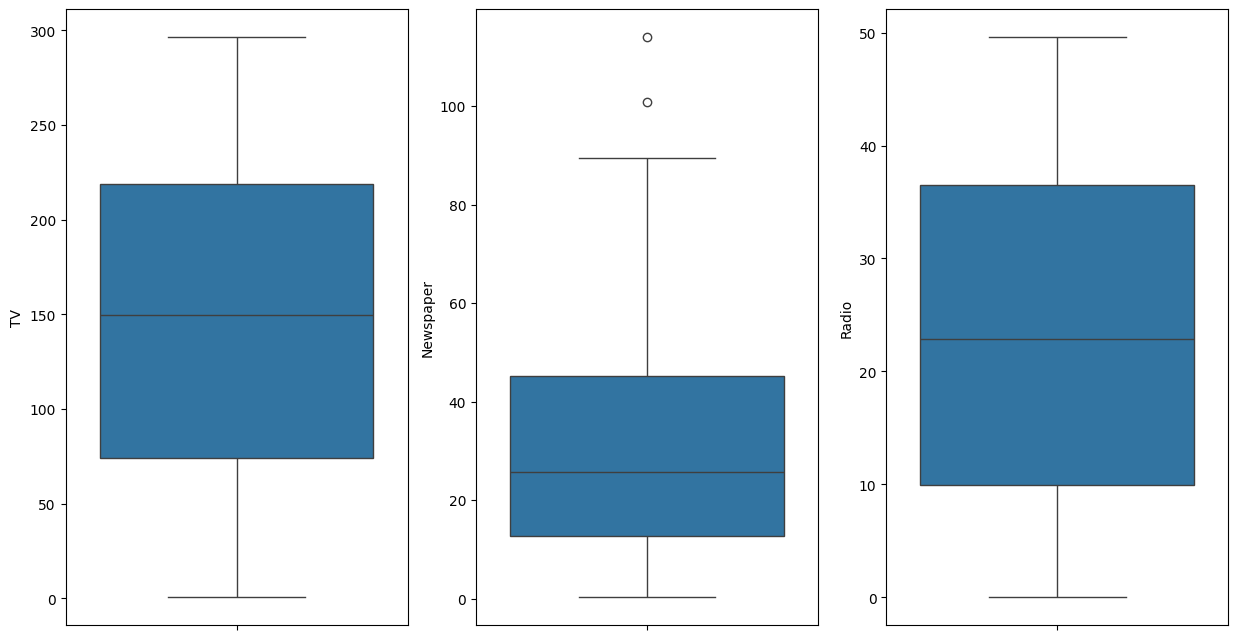

In [278]:
# plotting box plot, check for outliers
fig, axs = plt.subplots(1,3, figsize=(15,8))

sns.boxplot(df['TV'],ax=axs[0])
sns.boxplot(df['Newspaper'],ax=axs[1])
sns.boxplot(df['Radio'],ax=axs[2])

*Not alot of outliers detected. Newspaper has few outliers which can be easily handled.*

<Axes: ylabel='Sales'>

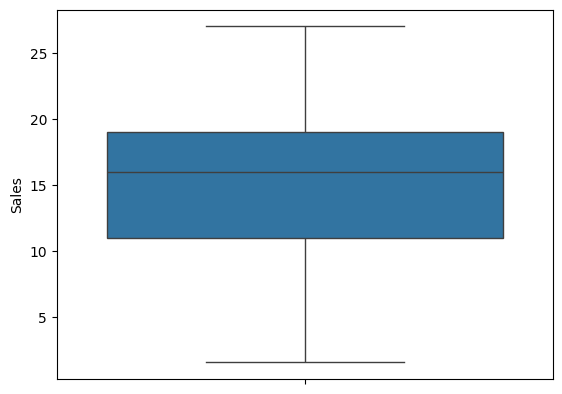

In [279]:
# checking the target variable

sns.boxplot(df['Sales'])

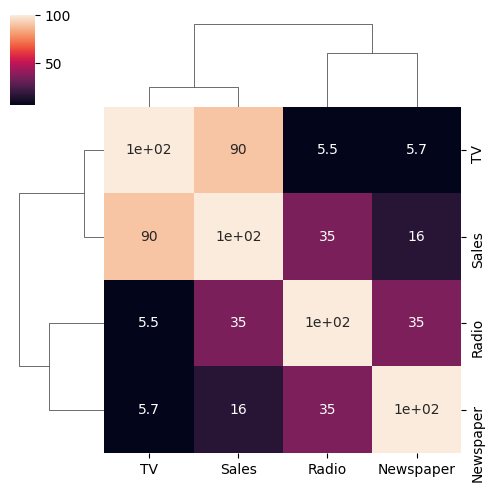

In [280]:
# Finding correlations between these variables

sns.clustermap(df.corr(method='pearson')*100,  annot=True, figsize=(5,5))

# *100, to see numbers as a %
# You can read as correlation of TV & Sales is 100
# TV has the biggest impact on sales

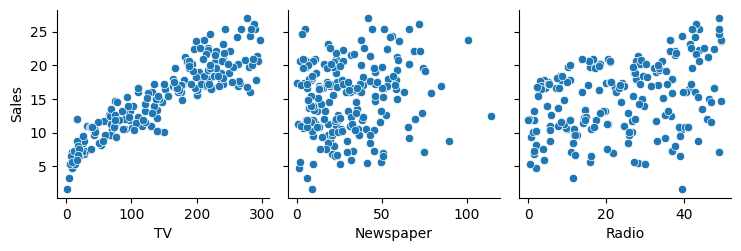

In [281]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', kind='scatter')

# TV & Sales has a linear relationship

# Model - Simple Linear Regression

In [282]:
# features
X = df.drop(columns=['Sales'])
# target
y = df[['Sales']]

In [283]:
# train test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3)

*By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below*

In [284]:
# adding constant
X_train = sm.add_constant(X_train)

# Ordinary Least Squares
lr = sm.OLS(y_train, X_train).fit()

In [285]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     427.8
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           4.85e-69
Time:                        21:12:07   Log-Likelihood:                -267.85
No. Observations:                 140   AIC:                             543.7
Df Residuals:                     136   BIC:                             555.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8427      0.350     13.847      0.0

*Looking at some key statistics from the summary*
*The values we are concerned with are -*

*The coefficients and significance (p-values)*
*R-squared*

*F statistic and its significance*

*1. The coefficient for TV is 0.054, with a very low p value*

*The coefficient is statistically significant. So the association is not purely by chance.*

*2. R - squared is 0.895*

*Meaning that 89.5% of the variance in Sales is explained by TV*

*This is a decent R-squared value.*

*3. F statistic has a very low p value (practically low)*

*Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.*

# Plotting

In [286]:
tv = X_train['TV']
radio = X_train['Radio']
sales = y_train

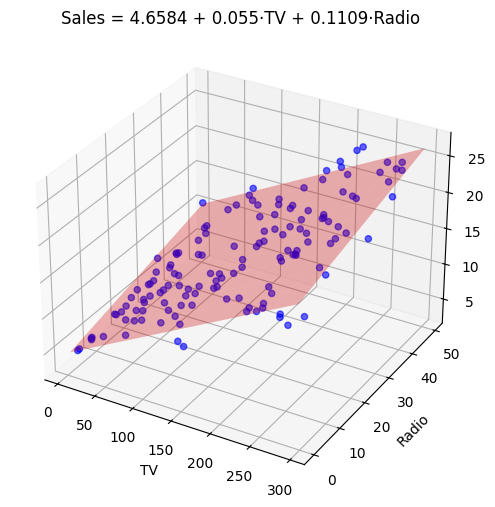

In [287]:
# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(tv, radio, sales, color='blue', alpha=0.6)

# Create grid for TV and Radio
tv_vals = np.linspace(tv.min(), tv.max(), 10)
radio_vals = np.linspace(radio.min(), radio.max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_vals, radio_vals)

# Calculate predicted Sales using your model
sales_pred = 4.6584 + 0.055 * tv_grid + 0.1109 * radio_grid

# Plot the regression plane
ax.plot_surface(tv_grid, radio_grid, sales_pred, color='red', alpha=0.3)

# Axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Sales = 4.6584 + 0.055·TV + 0.1109·Radio')

plt.show()

In [288]:
# features
X = df.drop(columns=['Sales','Radio','Newspaper'])
# target
y = df[['Sales']]

# train test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3)

# adding constant
X_train_sm = sm.add_constant(X_train)

# Ordinary Least Squares
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     545.1
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           8.99e-50
Time:                        21:12:07   Log-Likelihood:                -315.45
No. Observations:                 140   AIC:                             634.9
Df Residuals:                     138   BIC:                             640.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1392      0.397     17.975      0.0

In [289]:
y_train.shape

(140, 1)

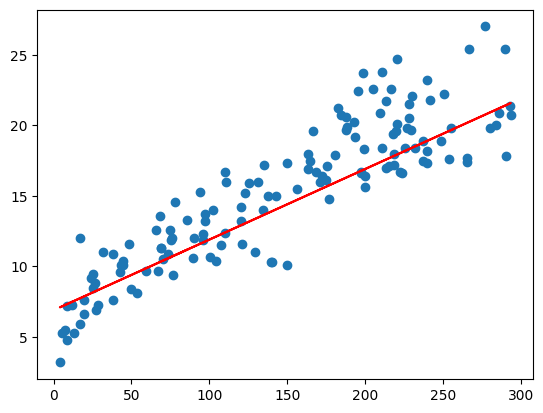

In [290]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.05*X_train+6.9, 'r')

# Model Evalutaion

In [291]:
lr.params

const    7.139202
TV       0.055132
dtype: float64

In [292]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [293]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [294]:
y_pred.head()

177    16.522686
82     11.290649
6      10.309298
187    17.674947
25     21.633431
dtype: float64

In [295]:
np.sqrt(mean_squared_error(y_test, y_pred))


2.2500072825491384

In [296]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8382356879897103

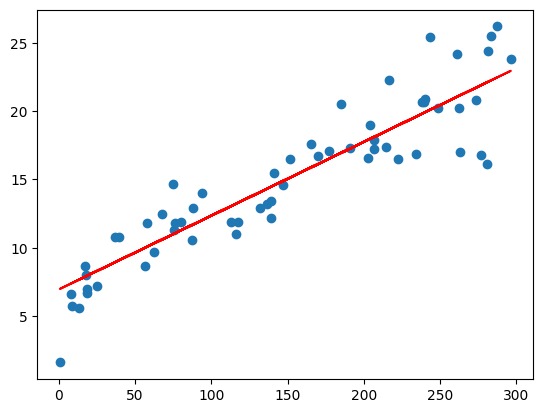

In [297]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()